# Titanic Dataset: Exploratory Data Analysis

Here, we're going to do some exploratory data analysis.

We'll try to find the answers of some arising questions. 

### Let's Begin Now.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

#Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Libraries
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,15

### Read Data

In [2]:
data = pd.read_csv('train.csv')
data.columns = [c.lower() for c in data.columns]

In [3]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
num_cols = list(data.select_dtypes(include=['number']).columns)
print('Numeric columns:',num_cols)
print('Categorical columns:',cat_cols)

Numeric columns: ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns: ['name', 'sex', 'ticket', 'cabin', 'embarked']


In [4]:
data.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.tail(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
data.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C


In [7]:
print('Shape of the train dataset {}'.format(data.shape))

Shape of the train dataset (891, 12)


In [8]:
#Info About Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Observation:

> ###### We noticed "age", "cabin" and "embarked" have some missing values.

,Total,Percent
cabin,687,0.771044
age,177,0.198653
embarked,2,0.002245
fare,0,0.000000
ticket,0,0.000000


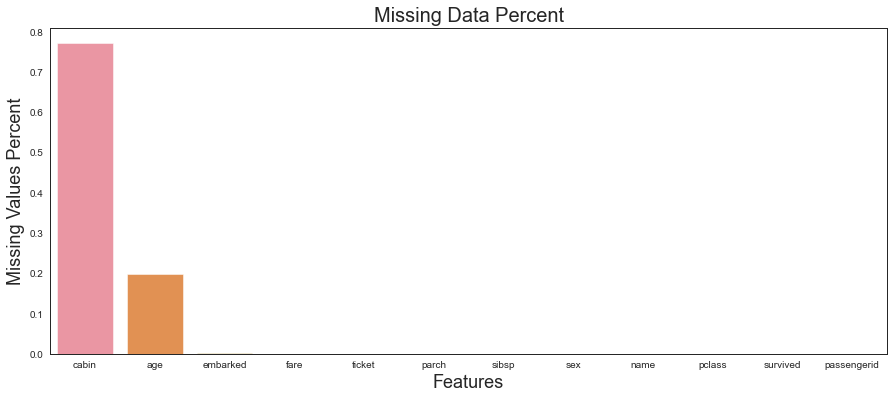

In [9]:
# Calculation To Find Missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Visualization Of Missing Data
plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=18)
plt.ylabel('Missing Values Percent', fontsize=18)
plt.title('Missing Data Percent', fontsize=20)

# Dataframe of Missing Data
missing_data.head()

In [10]:
# Get discriptive statistics on "all" datatypes
data.describe(include="all")

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kelly, Mrs. Florence ""Fannie""",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# Get discriptive statistics on "number" datatypes
data.describe(include = ['number'])

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Applying Univariate and Multivariate Data Analysis using Graphical Representations

### Univariate Analysis

<AxesSubplot:xlabel='age', ylabel='Density'>

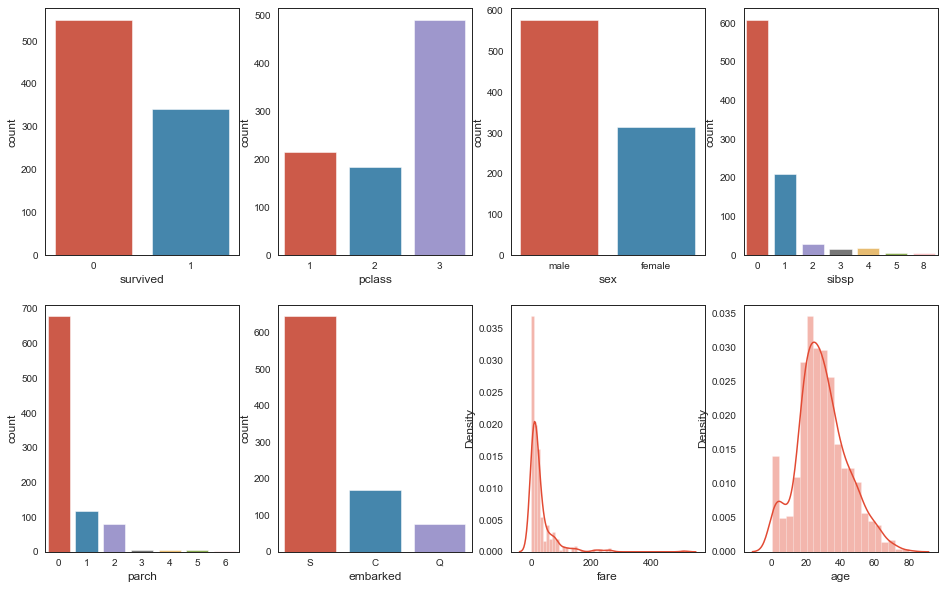

In [12]:
fig , axes = plt.subplots( 2, 4, figsize = (16,10) )

sns.countplot('survived' , data = data, ax = axes[0,0])
sns.countplot('pclass' , data = data, ax = axes[0,1])
sns.countplot('sex' , data = data, ax = axes[0,2])
sns.countplot('sibsp' , data = data, ax = axes[0,3])
sns.countplot('parch' , data = data, ax = axes[1,0])
sns.countplot('embarked' , data = data, ax = axes[1,1])

sns.distplot(data['fare'] , kde = True , ax = axes[1,2])
sns.distplot(data['age'].dropna() , kde = True , ax = axes[1,3])

### Bivariate Analysis

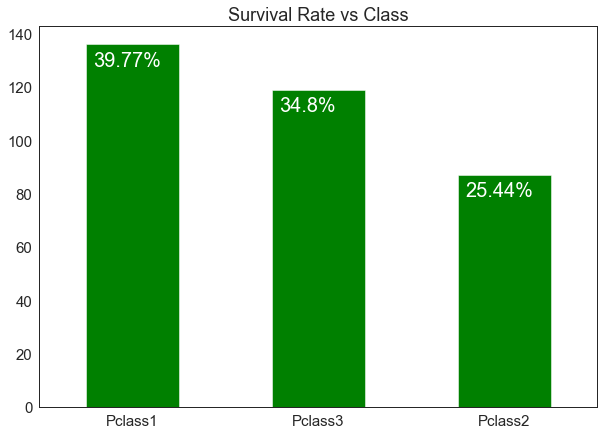

In [13]:
pclass_survival = data[data.survived == 1]
pclass_survival.head()

ax = pclass_survival.pclass.value_counts().plot(kind='bar', figsize=(10,7), fontsize=15, color = 'green');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title("Survival Rate vs Class", fontsize=18)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, str(round((i.get_height()/total)*100, 2))+'%', fontsize=20, color='white')


## Heatmap Of Missing data

<AxesSubplot:>

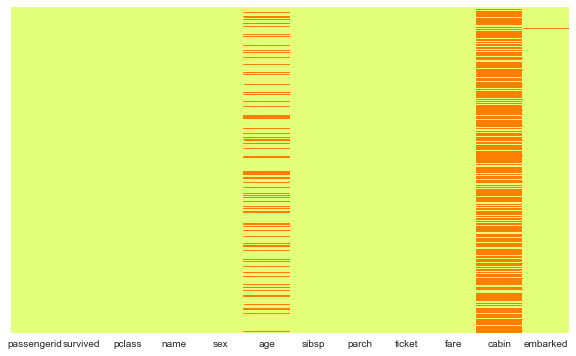

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Wistia')

## Data Cleaning

##### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='pclass', ylabel='age'>

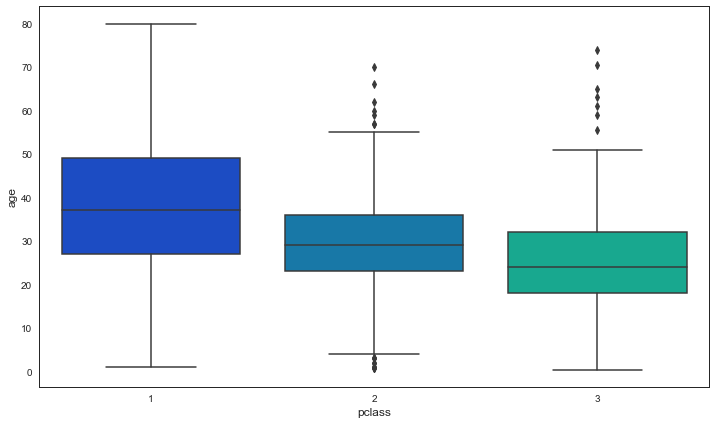

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass', y='age', data=data, palette='winter')

### Observation:
#### We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
#### We'll use these average age values to impute based on Pclass for Age.
#### We noticed from above boxplot, average age of pclass1 = 37, pclass2 = 29 and pclass3 = 24

In [16]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

#### Now apply above function 

In [17]:
data['age'] = data[['age','pclass']].apply(impute_age, axis=1)

#### Check Heatmap Again !

<AxesSubplot:>

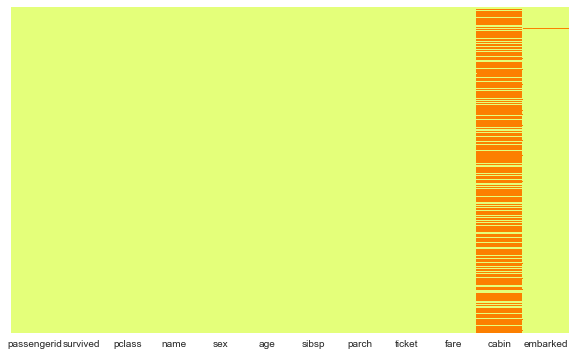

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Wistia')

#### Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [19]:
data.drop('cabin', axis=1, inplace=True)

In [20]:
pd.set_option('display.max_rows', data.shape[0]+1)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.00,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C


<AxesSubplot:>

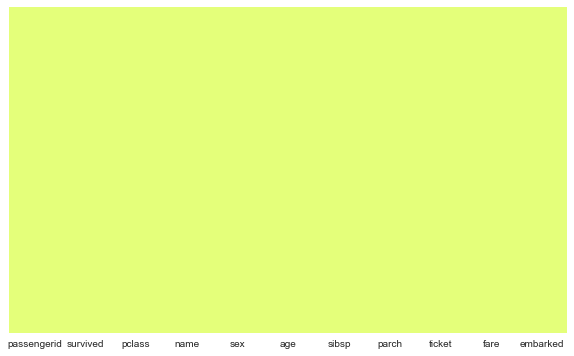

In [21]:
plt.figure(figsize=(10,6))
data.dropna(inplace=True)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Wistia')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  889 non-null    int64  
 1   survived     889 non-null    int64  
 2   pclass       889 non-null    int64  
 3   name         889 non-null    object 
 4   sex          889 non-null    object 
 5   age          889 non-null    float64
 6   sibsp        889 non-null    int64  
 7   parch        889 non-null    int64  
 8   ticket       889 non-null    object 
 9   fare         889 non-null    float64
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Multivariate Data Analysis

#### There is a positive correlation between Fare and Survived and 
#### negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

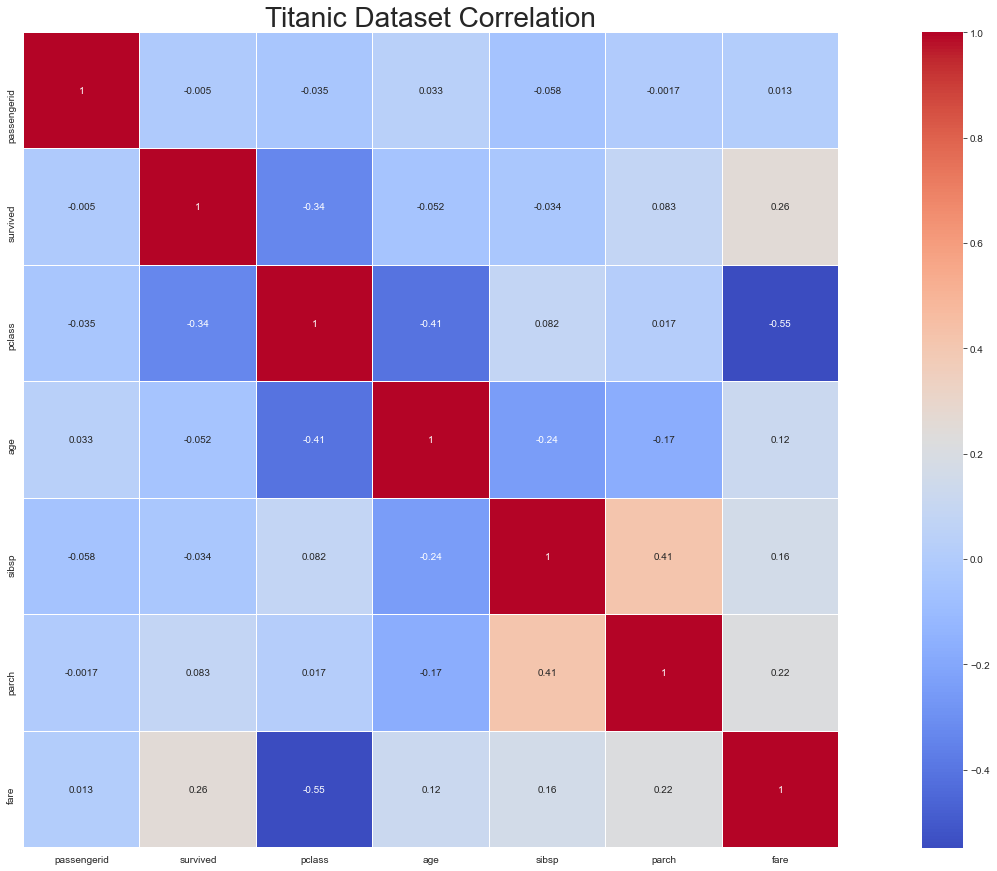

In [23]:
colmap = plt.cm.coolwarm

def matrix_corr( data , size = 10):
    corr = data.corr()
    plt.figure(figsize=(30,15))
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colmap, linecolor='white', annot=True)

matrix_corr(data , size = 10)

### ** Note that the categorical features have been neglected in the correlation matrix.

### Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

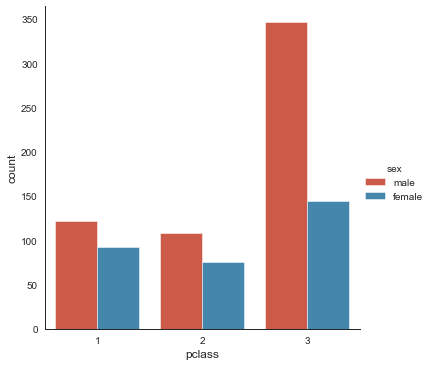

In [25]:
sns.factorplot('pclass', data=data, hue='sex', kind='count')

#### ** Notice that there are more male passengers than woman in the 3rd class than any other class.
#### We can create a histogram from the dataset, to present the distribution of number passengers of different age groups.

<AxesSubplot:xlabel='age', ylabel='Count'>

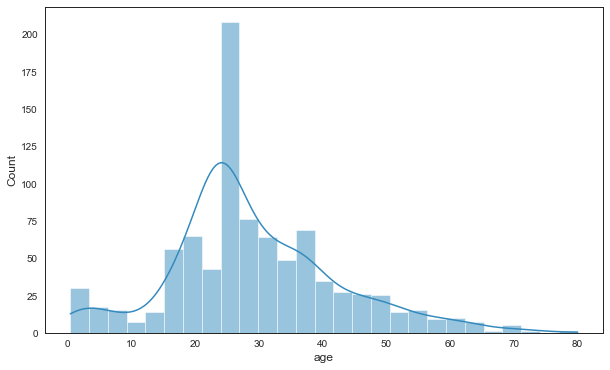

In [108]:
plt.figure(figsize=(10,6))
sns.histplot(data.age, kde=True)

### Check for age distribution according to different classes 

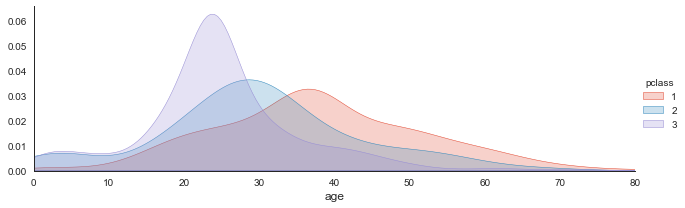

In [42]:
fig = sns.FacetGrid(data, hue='pclass', aspect=3)
fig.map(sns.kdeplot, 'age', shade=True)
fig.set(xlim=(0, data.age.max()))
fig.add_legend()

#### Notice- As expected, first class has more older people than second and third classes

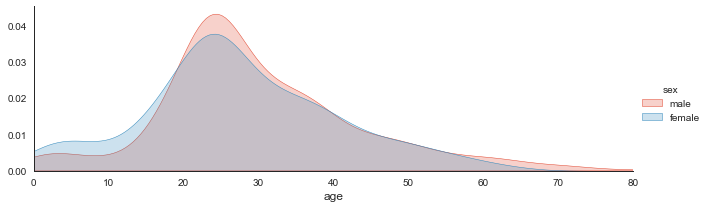

In [44]:
# Male and Female age distribution using FacetGrid
fig = sns.FacetGrid(data, hue='sex', aspect=3)
fig.map(sns.kdeplot, 'age', shade=True)
fig.set(xlim=(0, data.age.max()))
fig.add_legend()

### Where did the passengers come from?

The Embarked feature contains data for the passengers port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

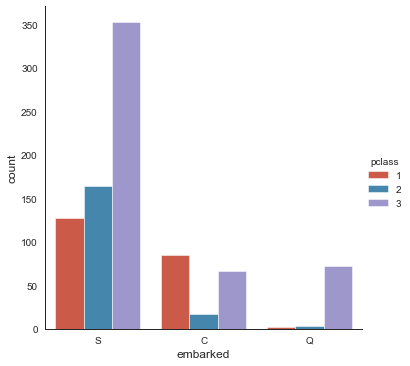

In [47]:
sns.factorplot('embarked', data=data, hue='pclass', kind='count')

##### Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). Also interesting is that very less  first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.

### Who was with their family?

##### The SibsSP feature refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

In [48]:
data['alone'] = data.apply(lambda x: 'No' if x.sibsp + x.parch > 0 else 'Yes', axis=1)
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Yes


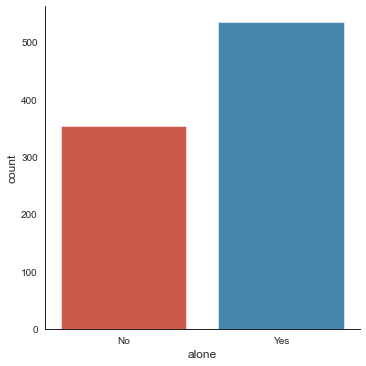

In [52]:
sns.catplot('alone', data=data, kind='count')

### What factors helped someone survive the sinking?

In [53]:
print(data[['pclass','survived']].groupby('pclass').mean())
print(data[['sex','survived']].groupby('sex').mean())

        survived
pclass          
1       0.626168
2       0.472826
3       0.242363
        survived
sex             
female  0.740385
male    0.188908


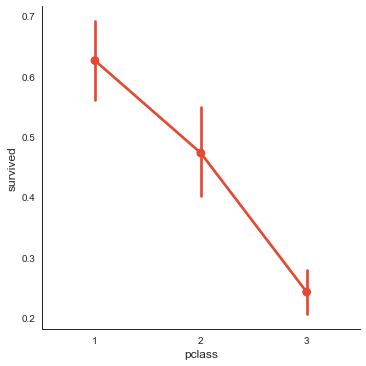

In [76]:
sns.catplot('pclass', 'survived', data=data, kind='point')

Unsurprisingly, lower class passengers had a lower chance of survival.
<br>But, we saw earlier that there were more men than woman, in the 3rd class than in any other class. However, priority to the lifeboats were given to women and children.

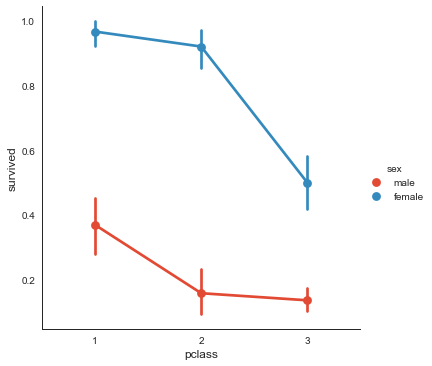

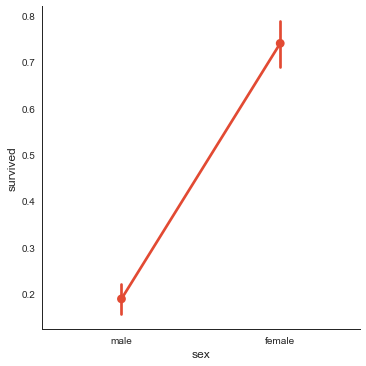

In [75]:
sns.catplot('pclass', 'survived', hue='sex', data=data, kind='point')
sns.catplot('sex', 'survived', data=data, kind='point')

### Notice- 
Men had lower chances of survival than women and children, as they had lower priority of being saved.
<br>We can generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

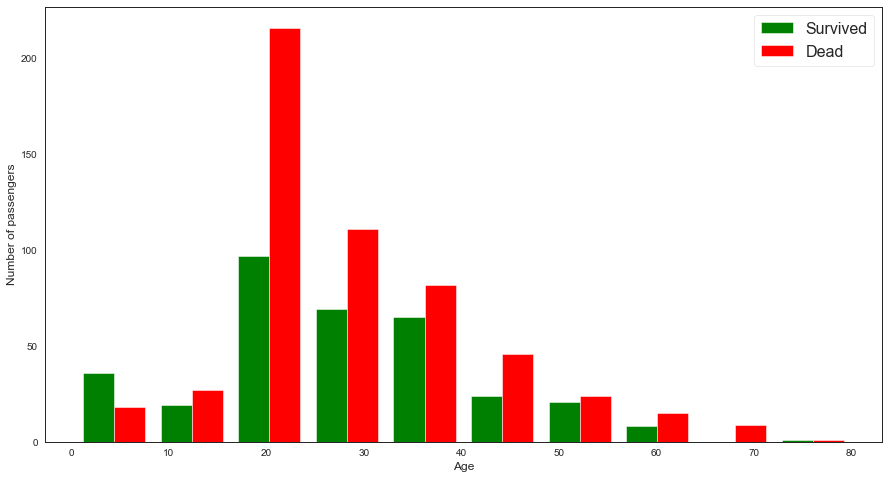

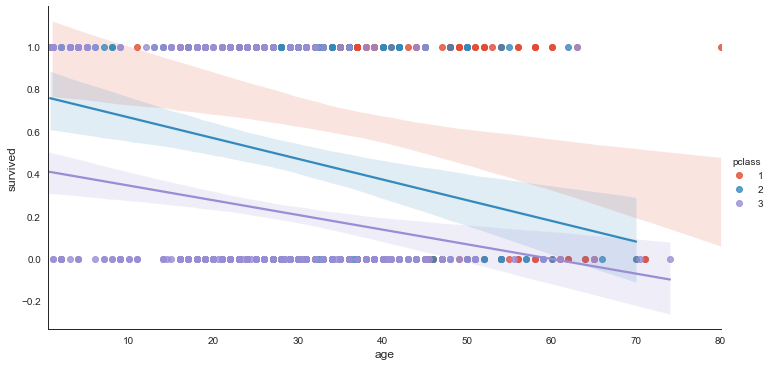

In [83]:
# dead and survived based on age of people

figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['age'].dropna(), data[data['survived']==0]['age'].dropna()], 
         color = ['g','r'], label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend(fontsize = '16')

sns.lmplot('age', 'survived', hue='pclass', data=data, aspect=2)

#### ***The general conclusion from the above two figures seems to be that older people were less likely to survive.

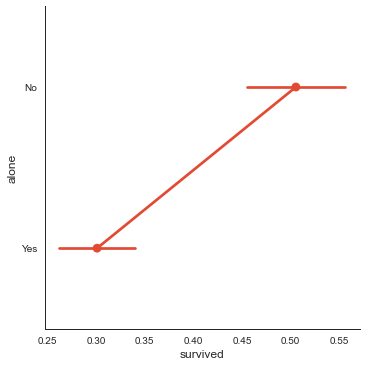

In [84]:
sns.catplot('survived', 'alone', data=data, kind='point')

In [85]:
data['familysize'] = data['sibsp'] + data['parch'] + 1
data[['familysize', 'survived']].groupby('familysize').mean()

,survived
familysize,
1,0.300935
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


#### Observation: If you weren't alone on the ship, you had a higher chance of survival, than if you were all alone.

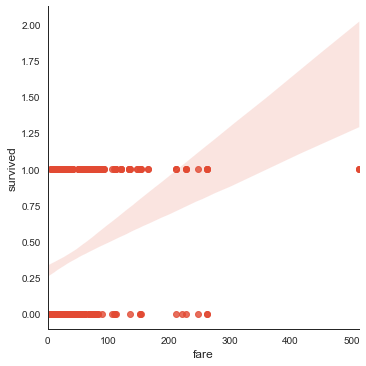

In [92]:
sns.lmplot('fare', 'survived', data=data)

#### Observation: Passengers with cheaper ticket fares are more likely to die. But, passengers with more expensive tickets was survived

In [93]:
data[['embarked','survived']].groupby('embarked').mean()

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


##### We observe that those embarked at Cherbourg have higher change of survival mainly this is because first class passengers were dominant in that port.

(0.0, 81.0)

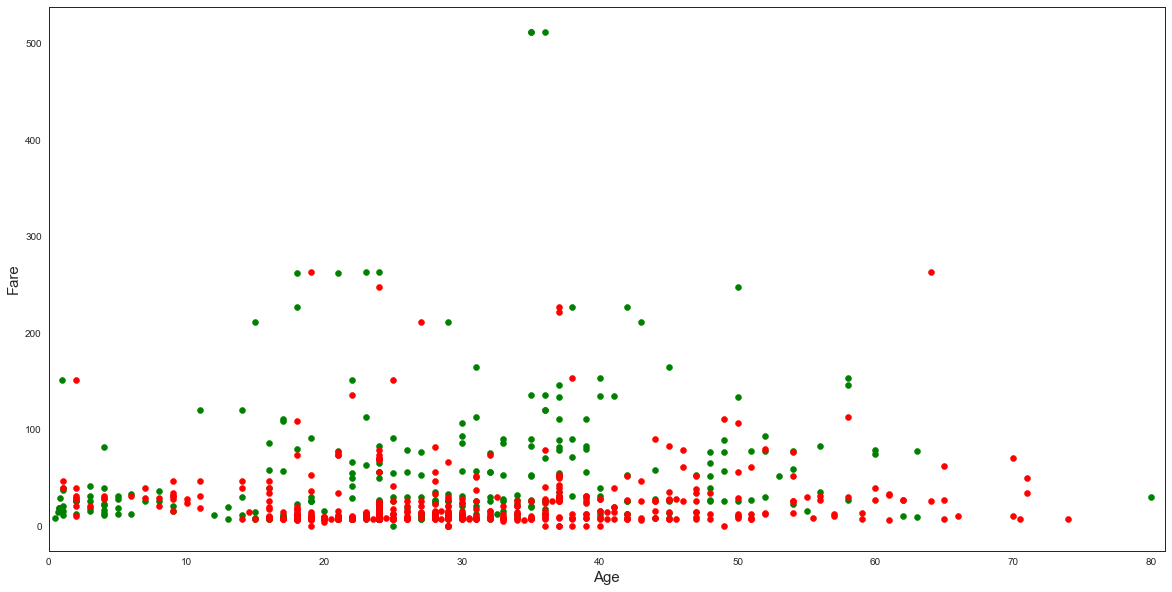

In [101]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()

ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], 
           c='green')
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], 
           c='red');

ax.set_xlabel("Age", fontsize='15')
ax.set_ylabel("Fare", fontsize='15')
ax.set_xlim(0, data.age.max()+1)

## Generally, those who survived were younger people and people with high fares.

In [106]:
# After coompletion of exploring, we have created two new columns- 'alone' and 'familysize' for need to better explore.

data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'alone', 'familysize'],
      dtype='object')

In [107]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,alone,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,No,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,No,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,No,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Yes,1


# THANK YOU FOR EXPLORING :-)